# Exploring the demographic of OkCupid Data App User Profiles
Truong Pham Nguyen

Sep 22, 2022

In [130]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import re
import math as mth
import sys
sys.path.insert(0, '/Users/kudo/DAI-Military/assignments/midterm_project/daimil-midterm-project/src')
from clean_text import remove_punctuation as rp
from clean_text import remove_stopwords as rs

In [131]:
# Read and save dataset into 
cupid_df = pd.read_csv("../data/okcupid_profiles.csv")
# Check the data
cupid_df.head()
# Sampling the rows
cupid_df.sample(3)

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
19701,26,single,m,straight,athletic,mostly anything,socially,never,graduated from law school,black,...,i'm an attorney working in the social justice ...,"recent law school graduate, looking to take th...",getting out of tickets/jury duty making up lyr...,my height for sure - 6'4,"books: mainly non-fiction, anything civil rig...",music books conversation friends family sex,law and social justice,trying to relax after a very stressful week,11,you think we would be a good fit you feel like...
13400,26,single,m,straight,athletic,NaN,socially,never,two-year college,white,...,looking for a good hearted women that i can sp...,just ask =),making eggs and breakfast in general. modifyin...,NaN,NaN,NaN,NaN,"go out to local bars, go dancing, enjoy myself...",i may potentially cry at really sad parts of m...,you would like to get to know me....this site ...
26352,39,single,m,gay,fit,NaN,often,never,graduated from med school,white,...,"i'm anti-anti i'm an artist i'm a lover, and a...","well, i ordered my life from the internet yest...",herding stray minds onto the dance floor prepa...,i'm refreshingly unusual. the leopard does ind...,book: not my thing...can't sit still. although...,faux kung fu-ing with my nephew checking in at...,aesthetic organization moving to sf developing...,going underground. i don't mix with the typica...,"if i admit it, it's not private. hmmm? i'm mil...",sardonic/srdnik/ adjective: grimly mocking or ...


In [132]:
# Check dataset data types
cupid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   status       59946 non-null  object 
 2   sex          59946 non-null  object 
 3   orientation  59946 non-null  object 
 4   body_type    54650 non-null  object 
 5   diet         35551 non-null  object 
 6   drinks       56961 non-null  object 
 7   drugs        45866 non-null  object 
 8   education    53318 non-null  object 
 9   ethnicity    54266 non-null  object 
 10  height       59943 non-null  float64
 11  income       59946 non-null  int64  
 12  job          51748 non-null  object 
 13  last_online  59946 non-null  object 
 14  location     59946 non-null  object 
 15  offspring    24385 non-null  object 
 16  pets         40025 non-null  object 
 17  religion     39720 non-null  object 
 18  sign         48890 non-null  object 
 19  smok

In [133]:
# Duplicated rows
cupid_df.duplicated().sum()

0

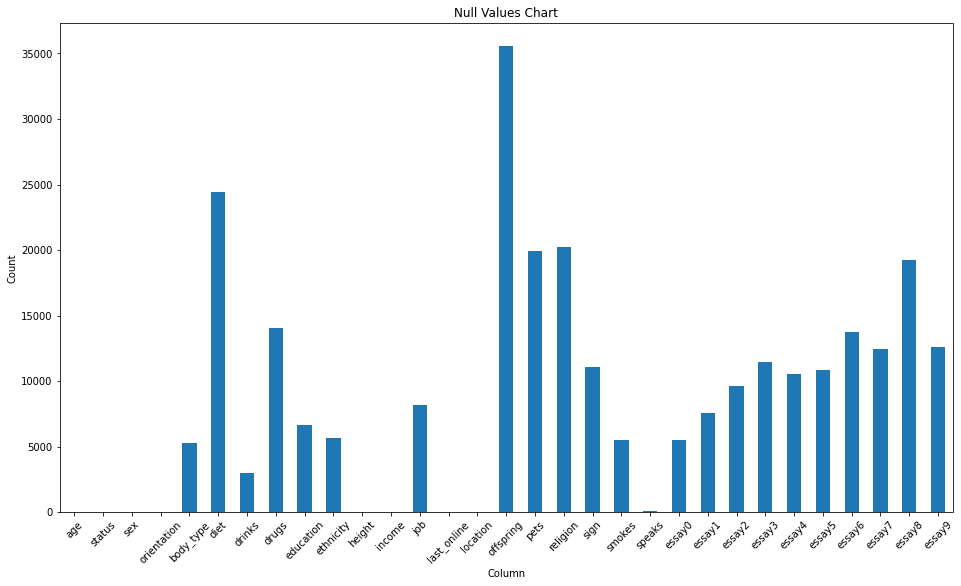

In [144]:
# Null values across columns
# cupid_df.isnull().sum()
plt.figure(figsize=(16, 9))
plt.title('Null Values Chart')
plt.xlabel('Column')
plt.ylabel('Count')
cupid_df.isnull().sum().plot(kind='bar')
plt.xticks(rotation=45)
plt.savefig("../img/null_values.png")


In [57]:
# Describing the data
cupid_df.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


In [58]:
# Count the number of unique values
cupid_df.nunique()

age               54
status             5
sex                2
orientation        3
body_type         12
diet              18
drinks             6
drugs              3
education         32
ethnicity        217
height            60
income            13
job               21
last_online    30123
location         199
offspring         15
pets              15
religion          45
sign              48
smokes             5
speaks          7647
essay0         54347
essay1         51516
essay2         48625
essay3         43520
essay4         49257
essay5         48961
essay6         43583
essay7         45548
essay8         39323
essay9         45440
dtype: int64

In [59]:
# Seeing/counting all the labels
for c in cupid_df.columns:    
    print (f"----< {c} >----")
    print(cupid_df[c].value_counts())

----< age >----
26     3724
27     3685
28     3583
25     3531
29     3295
24     3242
30     3149
31     2735
23     2592
32     2587
33     2206
22     1934
34     1902
35     1755
36     1583
37     1427
38     1330
21     1282
39     1172
42     1072
40     1030
41      980
20      953
43      858
44      708
45      643
19      611
46      578
47      529
48      481
49      459
50      437
51      350
52      344
18      309
56      271
54      267
55      265
57      256
53      252
59      221
58      197
60      195
61      176
62      167
63      138
64      113
65      109
66      105
67       66
68       59
69       31
110       1
109       1
Name: age, dtype: int64
----< status >----
single            55697
seeing someone     2064
available          1865
married             310
unknown              10
Name: status, dtype: int64
----< sex >----
m    35829
f    24117
Name: sex, dtype: int64
----< orientation >----
straight    51606
gay          5573
bisexual     2767
Name: 

In [60]:
# Accounting for number of unique types of each categorical columns
# This unq_val_count Series will be used for String look up through <essayX> columns
unq_val_count={c:pd.DataFrame(cupid_df[c].value_counts()) for c in cupid_df.columns}
unq_val_count = pd.Series(unq_val_count)
unq_val_count

age                  age
26   3724
27   3685
28   3583
25   3...
status                         status
single           55697
...
sex                                        sex
m  35829
f  24117
orientation              orientation
straight        51606
ga...
body_type                      body_type
average             ...
diet                                 diet
mostly anything    ...
drinks                      drinks
socially      41780
rarely...
drugs                     drugs
never      37724
sometimes   ...
education                                         education
g...
ethnicity                                                    ...
height               height
70.0    6074
68.0    5449
67.0   ...
income                   income
-1         48442
 20000      ...
job                                                job
other ...
last_online                      last_online
2012-06-29-22-56...
location                                       location
san f...
offspring                

In [61]:
# age               54, sex                2, drinks             6, drugs              3, education         32, ethnicity        217

# orientation_df = cupid_df['orientation'].value_counts()
# fig=px.treemap(orientation_df,
#                path=[orientation_df.index],
#                values=orientation_df.values,
#                title="Orientation distribution",
#                color=orientation_df.index,
#                color_discrete_sequence=px.colors.sequential.PuBuGn,
#                template='plotly_dark',
#                width=1000, height=500
#               )
# percents = np.round((100*orientation_df.values / sum(orientation_df.values)).tolist(),2)
# fig.data[0].customdata = [percents[0],percents[1],percents[2]]
# fig.data[0].texttemplate = '%{label}<br>%{value}<br>%{customdata}%'
# fig.update_layout(font=dict(size=19,family="Franklin Gothic"))

# fig.show()

/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [62]:
# age               54, sex                2, drinks             6, drugs              3, education         32, ethnicity        217

gender_df = cupid_df['sex'].value_counts()
fig=px.treemap(gender_df,
               path=[gender_df.index],
               values=gender_df.values,
               title="Gender distribution",
               color=gender_df.index,
               color_discrete_sequence=px.colors.sequential.PuBuGn,
               template='plotly_dark',
               width=1000, height=500
              )
percents = np.round((100*gender_df.values / sum(gender_df.values)).tolist(),2)
fig.data[0].customdata = percents
fig.data[0].texttemplate = '%{label}<br>%{value}<br>%{customdata}%'
fig.update_layout(font=dict(size=19,family="Franklin Gothic"))
fig.show()

/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [63]:
age_df=cupid_df['age'].value_counts()
fig=px.treemap(age_df,
               path=[age_df.index],
               values=age_df.values,
               title="Age distribution",
               color=age_df.index,
               color_discrete_sequence=px.colors.sequential.PuBuGn,
               template='plotly_dark',
               width=1000, height=500
              )

percents = np.round((100*age_df.values / sum(age_df.values)).tolist(),2)
fig.data[0].customdata = percents
fig.data[0].texttemplate = '%{label}<br>%{value}<br>%{customdata}%'
fig.update_layout(font=dict(size=19,family="Franklin Gothic"))
fig.show()

/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [83]:
# Revised education column, using custom created csv 
# through self labeling using the most conservative judgement
edu_cat_df = pd.read_csv("../data/education_category_revised.csv")
edu_cat_df
edu_cat_df.sort_values('revised')

,original,revised
0,graduated from college/university,Associate's Degree
17,two-year college,Associate's Degree
4,graduated from two-year college,Associate's Degree
11,college/university,Associate's Degree
16,working on law school,Bachelor's Degree
30,dropped out of med school,Bachelor's Degree
18,working on med school,Bachelor's Degree
20,dropped out of masters program,Bachelor's Degree
3,working on masters program,Bachelor's Degree
29,dropped out of law school,Bachelor's Degree


In [65]:
# Prepping data to use with .replace()
edu_cat_df = edu_cat_df.set_index('original')
edu_cat_dict = edu_cat_df.to_dict()
edu_cat_dict


{'revised': {'graduated from college/university': "Associate's Degree",
  'graduated from masters program': "Master's Degree",
  'working on college/university': 'Some College',
  'working on masters program': "Bachelor's Degree",
  'graduated from two-year college': "Associate's Degree",
  'graduated from high school': 'High school',
  'graduated from ph.d program': 'Doctorate Degree',
  'graduated from law school': 'Law degree',
  'working on two-year college': 'Some College',
  'dropped out of college/university': 'Some College',
  'working on ph.d program': "Master's Degree",
  'college/university': "Associate's Degree",
  'graduated from space camp': 'Space Camp',
  'dropped out of space camp': 'Some Education',
  'graduated from med school': 'Medical Degree',
  'working on space camp': 'Some Education',
  'working on law school': "Bachelor's Degree",
  'two-year college': "Associate's Degree",
  'working on med school': "Bachelor's Degree",
  'dropped out of two-year college': 'S

In [66]:
# Accessing nested dictionary
edu_cat_dict = edu_cat_dict['revised']

In [180]:
cupid_df['ethnicity'].value_counts().to_dict()


{'white': 32831,
 'asian': 6134,
 'hispanic / latin': 2823,
 'black': 2008,
 'other': 1706,
 'hispanic / latin, white': 1301,
 'indian': 1077,
 'asian, white': 811,
 'white, other': 641,
 'pacific islander': 432,
 'asian, pacific islander': 395,
 'native american, white': 338,
 'middle eastern': 329,
 'middle eastern, white': 300,
 'black, white': 298,
 'pacific islander, white': 156,
 'hispanic / latin, other': 138,
 'black, other': 133,
 'black, hispanic / latin': 119,
 'hispanic / latin, white, other': 117,
 'black, native american, white': 110,
 'black, native american': 100,
 'asian, other': 95,
 'asian, hispanic / latin': 88,
 'native american, hispanic / latin, white': 87,
 'native american, hispanic / latin': 73,
 'asian, white, other': 69,
 'native american': 67,
 'asian, middle eastern, black, native american, indian, pacific islander, hispanic / latin, white, other': 66,
 'asian, black': 59,
 'pacific islander, hispanic / latin': 57,
 'asian, pacific islander, white': 55,
 '

In [166]:
# Revising education column, shortens amount of labels
cupid_revised_df = cupid_df.replace({"education": edu_cat_dict})

# Replace -1 with nan values in "income" column
cupid_revised_df.loc[cupid_revised_df['income'] < 0, 'income'] = np.nan

# Using astype(str) to deal with nan values. nan values when combining with str will return a nan, therefore spoil the integrity of data
cupid_revised_df['all_essays'] = cupid_revised_df['essay0'].astype(str) + cupid_revised_df['essay1'].astype(str) + cupid_revised_df['essay2'].astype(str) + cupid_revised_df['essay3'].astype(str) + cupid_revised_df['essay4'].astype(str) + cupid_revised_df['essay5'].astype(str) + cupid_revised_df['essay6'].astype(str) + cupid_revised_df['essay7'].astype(str) + cupid_revised_df['essay8'].astype(str) + cupid_revised_df['essay9'].astype(str)

# Removing locations and last_online column
cupid_revised_df = cupid_revised_df.drop(columns=['location','last_online'])

# Dropping essay0, essay1, essay2 ... etc.
cupid_revised_df = cupid_revised_df.drop(columns=['essay0','essay1','essay2','essay3','essay4','essay5','essay6','essay7','essay8','essay9'])



cupid_revised_df

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,offspring,pets,religion,sign,smokes,speaks,all_essays
0,22,single,m,straight,a little extra,strictly anything,socially,never,Some College,"asian, white",75.0,NaN,transportation,"doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,sometimes,english,about me: i would love to think that i was so...
1,35,single,m,straight,average,mostly other,often,sometimes,Some Education,white,70.0,80000.0,hospitality / travel,"doesn't have kids, but might want them",likes dogs and likes cats,agnosticism but not too serious about it,cancer,no,"english (fluently), spanish (poorly), french (...",i am a chef: this is what that means. 1. i am ...
2,38,available,m,straight,thin,anything,socially,NaN,Master's Degree,NaN,68.0,NaN,NaN,NaN,has cats,NaN,pisces but it doesn&rsquo;t matter,no,"english, french, c++","i'm not ashamed of much, but writing public te..."
3,23,single,m,straight,thin,vegetarian,socially,NaN,Some College,white,71.0,20000.0,student,doesn't want kids,likes cats,NaN,pisces,no,"english, german (poorly)",i work in a library and go to school. . .readi...
4,29,single,m,straight,athletic,NaN,socially,never,Associate's Degree,"asian, black, other",66.0,NaN,artistic / musical / writer,NaN,likes dogs and likes cats,NaN,aquarius,no,english,hey how's it going? currently vague on the pro...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59941,59,single,f,straight,NaN,NaN,socially,never,Associate's Degree,NaN,62.0,NaN,sales / marketing / biz dev,has kids,has dogs,catholicism but not too serious about it,cancer and it&rsquo;s fun to think about,no,english,"vibrant, expressive, caring optimist. i love b..."
59942,24,single,m,straight,fit,mostly anything,often,sometimes,Some College,"white, other",72.0,NaN,entertainment / media,doesn't have kids,likes dogs and likes cats,agnosticism,leo but it doesn&rsquo;t matter,no,english (fluently),i'm nick. i never know what to write about mys...
59943,42,single,m,straight,average,mostly anything,not at all,never,Master's Degree,asian,71.0,100000.0,construction / craftsmanship,doesn't have kids,NaN,christianity but not too serious about it,sagittarius but it doesn&rsquo;t matter,no,english (fluently),"hello! i enjoy traveling, watching movies, and..."
59944,27,single,m,straight,athletic,mostly anything,socially,often,Some College,"asian, black",73.0,NaN,medicine / health,"doesn't have kids, but wants them",likes dogs and likes cats,agnosticism but not too serious about it,leo and it&rsquo;s fun to think about,trying to quit,"english (fluently), spanish (poorly), chinese ...","""all i have in this world are my balls and my ..."


In [173]:
serious_astrologist_keywords = [ 'scorpio and it matters a lot',
                                'leo and it matters a lot',
                                'cancer and it matters a lot',
                                'aquarius and it matters a lot',
                                'pisces and it matters a lot',
                                'gemini and it matters a lot',
                                'libra and it matters a lot',
                                'taurus and it matters a lot',
                                'aries and it matters a lot',
                                'sagittarius and it matters a lot',
                                'capricorn and it matters a lot',
                                'virgo and it matters a lot']
cupid_revised_df[cupid_revised_df['sign'].isin(serious_astrologist_keywords)]['sign'].count()



675

In [68]:

for i in speak_df:
    print(i)

english
english (fluently), spanish (poorly), french (poorly)
english, french, c++
english, german (poorly)
english
english (fluently), chinese (okay)
english
english, spanish (okay)
english
english (fluently)
english
english (fluently), sign language (poorly)
english
english
english
english (fluently), spanish (okay)
english (fluently), c++ (fluently), german (poorly), french (poorly)
english
english (fluently)
english (fluently)
english (fluently)
english (fluently), spanish (fluently), italian (okay)
english, spanish (poorly)
english
english
english
english (fluently), tagalog (fluently), japanese (okay)
english (fluently), other (fluently), thai (poorly)
english, spanish (poorly)
english
english, spanish (poorly)
english
english
english (fluently), spanish (fluently)
english
english, russian
english (fluently), spanish (fluently)
english (fluently), spanish (poorly)
english
english
english (fluently), dutch (fluently), lisp (fluently), spanish (okay), german (okay)
english
english,

In [188]:
# Picking just columns speaks
ethnicity_df = cupid_revised_df['ethnicity']
# Creating empty list to store ID of someone who speak Vietnamese
white_index = []
# Enumerate speak_df so that i store the index, row store the value for the rows
for i, row in ethnicity_df.iteritems():
    # use regualre expression to remove special character in this particular column 
    # included open/close parenthesis and comma 
    row = re.sub(r"[\(\),]","",str(row))
    # split the row into words inside list word_ls
    row_ls = row.split() 
    for word in row_ls:
        if word == 'white':
            white_index.append(i)
# print(white_index)
print(len(white_index))

37882


In [189]:
# Picking just columns speaks
ethnicity_df = cupid_revised_df['ethnicity']
# Creating empty list to store ID of someone who speak Vietnamese
asian_index = []
# Enumerate speak_df so that i store the index, row store the value for the rows
for i, row in ethnicity_df.iteritems():
    # use regualre expression to remove special character in this particular column 
    # included open/close parenthesis and comma 
    row = re.sub(r"[\(\),]","",str(row))
    # split the row into words inside list word_ls
    row_ls = row.split() 
    for word in row_ls:
        if word == 'asian':
            asian_index.append(i)
# print(asian_index)
print(len(asian_index))

8205


In [190]:
speak_df = cupid_revised_df['speaks']
# Creating empty list to store ID of someone who speak Vietnamese
vietnamese_index = []
# Enumerate speak_df so that i store the index, row store the value for the rows
for i, row in speak_df.iteritems():
    # use regualre expression to remove special character in this particular column 
    # included open/close parenthesis and comma 
    row = re.sub(r"[\(\),]","",str(row))
    # split the row into words inside list word_ls
    row_ls = row.split() 
    for word in row_ls:
        if word == 'vietnamese':
            vietnamese_index.append(i)
# print(vietnamese_index)

# Total people who speak Vietnamese
print(len(vietnamese_index))

400


In [192]:
vietnamese_df = cupid_revised_df.iloc[vietnamese_index]
vietnamese_df.describe()

,age,height,income
count,400.000000,400.000000,64.000000
mean,29.027500,66.235000,128593.750000
std,6.437028,3.680849,231824.147827
min,18.000000,58.000000,20000.000000
25%,25.000000,63.000000,30000.000000
50%,28.000000,67.000000,60000.000000
75%,32.000000,69.000000,100000.000000
max,63.000000,75.000000,1000000.000000


In [199]:
vietnamese_df[['education','age','sex','orientation','all_essays','speaks','ethnicity']][vietnamese_df.index.isin(white_index)].count()

education      37
age            39
sex            39
orientation    39
all_essays     39
speaks         39
ethnicity      39
dtype: int64

In [79]:
for i, v in vietnamese_df.iloc[9].iteritems():
    print(v)

23
single
m
straight
athletic
anything
socially
sometimes
Associate's Degree
asian
69.0
-1
banking / financial / real estate
2012-06-29-21-44
san francisco, california
doesn't have kids
likes dogs and dislikes cats
agnosticism but not too serious about it
capricorn and it&rsquo;s fun to think about
no
english (fluently), vietnamese (fluently)
grew up in l.a. attended college in the bay and stuck up here for work. social and outgoing. my interests range from enjoying a good laugh with friends at a house kickback to a buck wild night out in the city or could be just a simple walk on the beach watching the ocean waves and the beautiful scenery. absolutely love meeting new cool people from all walk of life as life itself is ultra short and we'd best be maximizing our experiences while still breathing!
still adjusting to the post-college working life that has been bombarded me with all these newly found responsibilities lol. i work in corporate finance so mostly busy during the week. though

In [174]:
serious_astrologist_keywords = [ 'scorpio and it matters a lot',
                                'leo and it matters a lot',
                                'cancer and it matters a lot',
                                'aquarius and it matters a lot',
                                'pisces and it matters a lot',
                                'gemini and it matters a lot',
                                'libra and it matters a lot',
                                'taurus and it matters a lot',
                                'aries and it matters a lot',
                                'sagittarius and it matters a lot',
                                'capricorn and it matters a lot',
                                'virgo and it matters a lot']
vietnamese_df[vietnamese_df['sign'].isin(serious_astrologist_keywords)]['sign'].count()

2

In [ ]:
# vietnamese_df = cupid_df.iloc[vietnamese_ls]
# vietnamese_f_df = vietnamese_df[vietnamese_df['sex']=='f']
# for index, essay in vietnamese_f_df['essay0'].iteritems():
#     print (index)
#     print (essay)
    

In [ ]:
# for i, v in cupid_df.loc[[1951]].iteritems():
#     print(i)
#     print(v)

In [ ]:
# cupid_df.rename(columns = {
#                         "essay0":"My self summary", 
#                         "essay1":"What I’m doing with my life",
#                         "essay2":"I’m really good at",
#                         "essay3":"The first thing people usually notice about me",
#                         "essay4":"Favorite books, movies, show, music, and food",
#                         "essay5":"The six things I could never do without",
#                         "essay6":"I spend a lot of time thinking about",
#                         "essay7":"On a typical Friday night I am",
#                         "essay8":"The most private thing I am willing to admit",
#                         "essay9":"You should message me if"})

In [ ]:
#Combining essays columns
essays_df = cupid_df[['essay0','essay1','essay2','essay3','essay4','essay5','essay6','essay7','essay8','essay9']]
essays_df

,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,,,i am very open and will share just about anyth...,
2,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",,cats and german philosophy,,,you feel so inclined.
4,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",,,,,
...,...,...,...,...,...,...,...,...,...,...
59941,"vibrant, expressive, caring optimist. i love b...",the happiest times have been when life came to...,i make an outstanding osso bucco. i am also ve...,"i am told that people notice my smile, eyes an...",i am an avid movie watcher and follow the broa...,"my family, my dog, italy, words and music!",writing my book.,"running with my dog, finishing up the work wee...",i have a dream to sing at the alconquin in nyc...,you are seeking a long term connection of shar...
59942,i'm nick. i never know what to write about mys...,currently finishing school for film production...,"filmmaking, photography, graphic design, web d...","dude, i don't know.","movies: hook (the greatest adventure ever!), g...",iphone contact lenses headphones camera tv rem...,i do most of my thinking on the bus to/from wo...,"bringin' home bacon, or drinking and shakin'!",when i was 18 i got a tattoo of waldo somewher...,meh if you made it this far you might as well.
59943,"hello! i enjoy traveling, watching movies, and...","i'm a civil engineer, who enjoys helping the c...",- looking at things objectively - getting thin...,i'm quiet until i get used to the environment ...,"last book: ""game change"". movies: bourne serie...",- iphone - friends and family - internet - bay...,"aside from work, how to improve my home.",out enjoying friendly conversation over dinner.,please let me think about this more.,we have similar interests.
59944,"""all i have in this world are my balls and my ...","following my dreams... ""you got a dream... you...",listening,it used to be the hair until i mowed it off bu...,where to begin musically: right now i listen t...,"music, family, friends, a basketball, hoop, so...",what can i do to make someone chuckle....,what i would do on any other day. everydays a ...,i like walking around in other people's house ...,you are interested and interesting...


In [ ]:
essay_0 = essays_df['essay0']
essay_0.iloc[0]

"about me:  i would love to think that i was some some kind of intellectual: either the dumbest smart guy, or the smartest dumb guy. can't say i can tell the difference. i love to talk about ideas and concepts. i forge odd metaphors instead of reciting cliches. like the simularities between a friend of mine's house and an underwater salt mine. my favorite word is salt by the way (weird choice i know). to me most things in life are better as metaphors. i seek to make myself a little better everyday, in some productively lazy way. got tired of tying my shoes. considered hiring a five year old, but would probably have to tie both of our shoes... decided to only wear leather shoes dress shoes.  about you:  you love to have really serious, really deep conversations about really silly stuff. you have to be willing to snap me out of a light hearted rant with a kiss. you don't have to be funny, but you have to be able to make me laugh. you should be able to bend spoons with your mind, and tele

In [ ]:
revised_text = rs(essay_0.iloc[0])
revised_text

"me: love think kind intellectual: dumbest smart guy, smartest dumb guy. can't say tell difference. love talk ideas concepts. forge odd metaphors instead reciting cliches. like simularities friend mine's house underwater salt mine. favorite word salt way (weird choice know). things life better metaphors. seek make little better everyday, productively lazy way. got tired tying shoes. considered hiring year old, probably tie shoes... decided wear leather shoes dress shoes. you: love really serious, really deep conversations really silly stuff. willing snap light hearted rant kiss. don't funny, able make laugh. able bend spoons mind, telepathically make smile work. love life, cool just letting wind blow. extra points reading guessing favorite video game (no hints given yet). lastly good attention span."

In [ ]:
# for i in range(essays_df.shape[0]): #iterate over rows
#     for j in range(essays_df.shape[1]): #iterate over columns
#         value = essays_df.loc[[i, j]] #get cell value
#         print(value, end="\t")
#     print()

In [ ]:
#     print (f"YOU'RE AT INDEX {index}")
#     for x in row:
#         print(f"--------{x}")